In [165]:
import warnings
warnings.filterwarnings('ignore')
# warnings.simplefilter('ignore')

# pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
hotels = pd.read_csv('hotel_reviews.csv')
hotels.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,Longitude,Latitude
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,4.915968,52.360576
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,4.915968,52.360576
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,4.915968,52.360576
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,4.915968,52.360576
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,4.915968,52.360576


In [167]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [168]:
# Duplicates handling

# calculating the number of rows before removing duplicates
rows_before = len(hotels)

# checking for and remove full duplicate rows to avoid skewing the analysis
hotels.drop_duplicates(inplace=True)

# calculating the number of rows after removing duplicates
rows_after = len(hotels)

# calculating the number of duplicates removed
duplicates_removed = rows_before - rows_after

# printing the result
if duplicates_removed > 0:
    print(f"{duplicates_removed} duplicates removed.")
else:
    print("No duplicates detected.")


526 duplicates removed.


In [169]:
# printing the unique hotel names
print(hotels['Hotel_Name'].unique())

# counting and printing the total number of unique hotels
total_unique_hotels = hotels['Hotel_Name'].nunique()
print(f"Total number of unique hotels: {total_unique_hotels}")

['Hotel Arena' 'K K Hotel George' 'Apex Temple Court Hotel' ...
 'The Berkeley' 'Holiday Inn London Kensington' 'Atlantis Hotel Vienna']
Total number of unique hotels: 1492


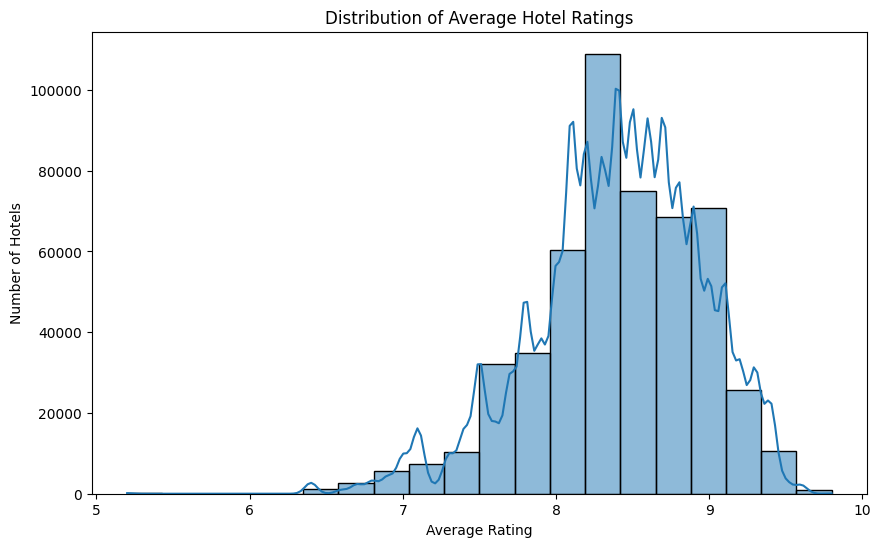

In [170]:
# Distribution of average hotel ratings

plt.figure(figsize=(10, 6))
sns.histplot(hotels['Average_Score'], bins=20, kde=True)
plt.title('Distribution of Average Hotel Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Number of Hotels')
plt.show()

In [171]:
# extracting the country from the hotel address 
# if the last word is "Kingdom", take the two last words instead
hotels['Country'] = hotels['Hotel_Address'].apply(lambda x: " ".join(x.split()[-2:]) if x.split()[-1] == "Kingdom" else x.split()[-1])

# printing the unique countries
unique_countries = hotels['Country'].unique()
print(unique_countries)

# counting the total number of unique countries
total_unique_countries = hotels['Country'].nunique()
print(f"Total number of unique countries: {total_unique_countries}")


['Netherlands' 'United Kingdom' 'France' 'Spain' 'Italy' 'Austria']
Total number of unique countries: 6


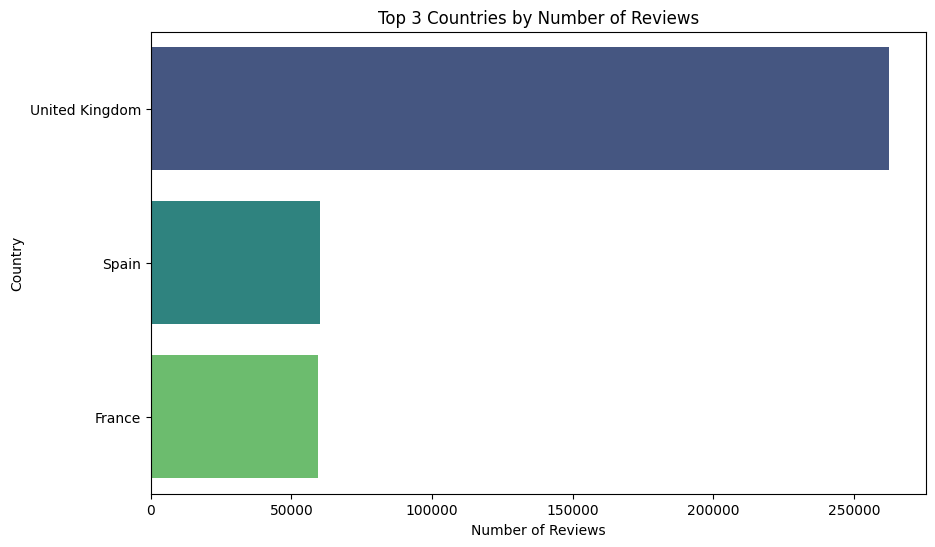

In [172]:
# Top 3 Countries by Number of Reviews

top_countries = hotels['Country'].value_counts().head(3)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 3 Countries by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Country')
plt.show()

In [173]:
# counting how many unique hotels are in each country
unique_hotels_per_country = hotels.groupby('Country')['Hotel_Name'].nunique()

# printing the counts
print(unique_hotels_per_country)


Country
Austria           158
France            458
Italy             162
Netherlands       105
Spain             211
United Kingdom    400
Name: Hotel_Name, dtype: int64


In [174]:
# checking if any latitude values are out of the realistic range of -90 - 90
invalid_latitude = hotels[(hotels['Latitude'] < -90) | (hotels['Latitude'] > 90)]
print(f"Rows with invalid latitude values: {len(invalid_latitude)}")

# checking if any longitude values are out of the realistic range of -180 - 180
invalid_longitude = hotels[(hotels['Longitude'] < -180) | (hotels['Longitude'] > 180)]
print(f"Rows with invalid longitude values: {len(invalid_longitude)}")

Rows with invalid latitude values: 0
Rows with invalid longitude values: 0


In [175]:
# analyzing the distribution of review scores
hotels['Reviewer_Score'].describe()

count    515212.000000
mean          8.395532
std           1.637467
min           2.500000
25%           7.500000
50%           8.800000
75%           9.600000
max          10.000000
Name: Reviewer_Score, dtype: float64

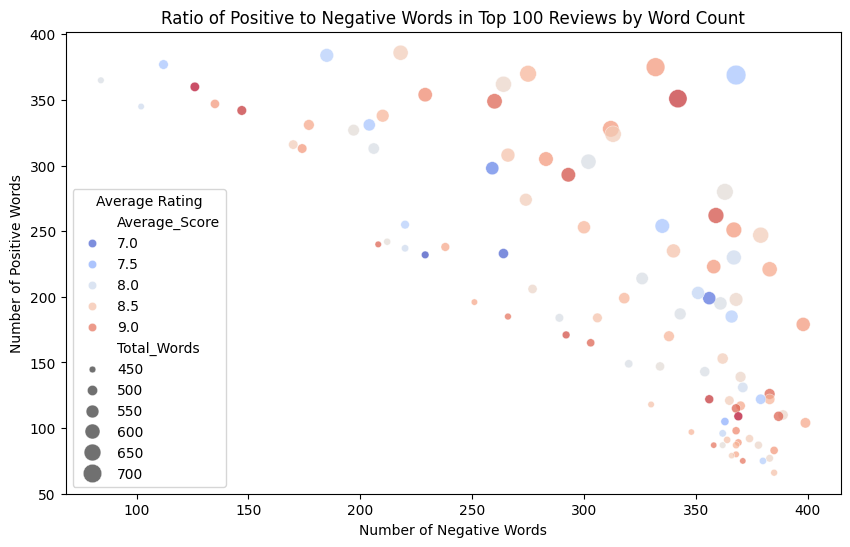

In [176]:
# Ratio of Positive to Negative Words in Reviews

hotels['Total_Words'] = hotels['Review_Total_Positive_Word_Counts'] + hotels['Review_Total_Negative_Word_Counts']
top_reviews = hotels.sort_values(by='Total_Words', ascending=False).head(100)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_reviews, x='Review_Total_Negative_Word_Counts', y='Review_Total_Positive_Word_Counts', hue='Average_Score', size='Total_Words', sizes=(20, 200), alpha=0.7, palette='coolwarm')
plt.title('Ratio of Positive to Negative Words in Top 100 Reviews by Word Count')
plt.xlabel('Number of Negative Words')
plt.ylabel('Number of Positive Words')
plt.legend(title='Average Rating')
plt.show()


In [177]:
# сonverting Review_Date from string to datetime format
hotels['Review_Date'] = pd.to_datetime(hotels['Review_Date'], errors='coerce')

# checking the first few rows to verify the conversion
hotels['Review_Date'].head()

0   2017-08-03
1   2017-08-03
2   2017-07-31
3   2017-07-31
4   2017-07-24
Name: Review_Date, dtype: datetime64[ns]

In [178]:
# checking for impossible dates
future_dates = hotels[hotels['Review_Date'] > pd.Timestamp.now()]
print(f"Number of future dates: {len(future_dates)}")

very_old_dates = hotels[hotels['Review_Date'] < pd.Timestamp('1990-01-01')]
print(f"Number of very old dates: {len(very_old_dates)}")

Number of future dates: 0
Number of very old dates: 0


In [179]:
# selecting only numerical columns from the original DataFrame
numerical_hotels = hotels.select_dtypes(include=['int64', 'float64'])

# adding the 'Hotel_Name' column to perform groupby
numerical_hotels['Hotel_Name'] = hotels['Hotel_Name']

# creating an additional DataFrame with mean values for each hotel
hotels_unique = numerical_hotels.groupby('Hotel_Name').mean()

# rounding all mean numeric values to one decimal place
# hotels_unique = hotels_unique.round(1)

# resetting index to make Hotel_Name a column again
hotels_unique.reset_index(inplace=True)

# checking the first few rows of the new DataFrame to verify
display(hotels_unique.head())

,Hotel_Name,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Longitude,Latitude,Total_Words
0,11 Cadogan Gardens,101.0,8.7,15.5,393.0,20.0,7.2,8.8,-0.2,51.5,35.5
1,1K Hotel,69.0,7.7,24.9,663.0,15.6,9.1,7.9,2.4,48.9,40.5
2,25hours Hotel beim MuseumsQuartier,391.0,8.8,16.2,4324.0,21.9,8.7,9.0,16.4,48.2,38.1
3,41,66.0,9.6,8.9,244.0,25.3,6.0,9.7,-0.1,51.5,34.2
4,45 Park Lane Dorchester Collection,27.0,9.4,6.8,68.0,11.5,7.2,9.6,-0.2,51.5,18.3


The difference between Average_Score and the mean of Reviewer_Score reflects the variability in guest experiences and can indicate changes in hotel quality over time. It highlights the importance of considering multiple metrics for a comprehensive evaluation.

In [180]:
hotels_unique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Hotel_Name                                  1492 non-null   object 
 1   Additional_Number_of_Scoring                1492 non-null   float64
 2   Average_Score                               1492 non-null   float64
 3   Review_Total_Negative_Word_Counts           1492 non-null   float64
 4   Total_Number_of_Reviews                     1492 non-null   float64
 5   Review_Total_Positive_Word_Counts           1492 non-null   float64
 6   Total_Number_of_Reviews_Reviewer_Has_Given  1492 non-null   float64
 7   Reviewer_Score                              1492 non-null   float64
 8   Longitude                                   1492 non-null   float64
 9   Latitude                                    1492 non-null   float64
 10  Total_Words 

In [181]:
# Группировка данных по координатам и подсчет количества уникальных названий и адресов в каждой группе
duplicates = hotels.groupby(['Latitude', 'Longitude']).agg({
    'Hotel_Name': pd.Series.nunique, 
    'Hotel_Address': pd.Series.nunique
}).reset_index()

# Фильтрация групп, где количество уникальных названий или адресов больше 1
duplicates_with_different_names_or_addresses = duplicates[
    (duplicates['Hotel_Name'] > 1) | 
    (duplicates['Hotel_Address'] > 1)
]

# Вывод результатов
if not duplicates_with_different_names_or_addresses.empty:
    print("There are duplicate coordinates with different hotel names or addresses:")
    print(duplicates_with_different_names_or_addresses)
else:
    print("All duplicate coordinates have the same hotel name and address.")


There are duplicate coordinates with different hotel names or addresses:
       Latitude  Longitude  Hotel_Name  Hotel_Address
336   45.485888   9.204283           2              2
344   45.488764   9.183057           2              2
527   48.265968  16.340522           2              2
670   48.856818   2.304722           2              2
1071  51.498147  -0.143649           2              2
1142  51.506935  -0.126012           2              1
1198  51.511945  -0.179939           2              2


In [182]:
# pip3 install folium
import folium
import random

# сreating a map centered around the center of London
map_hotels = folium.Map(location=[51.5074, -0.1278], zoom_start=10)

def jitter(value):
    """Добавляет небольшой случайный сдвиг к координатам для визуального разделения."""
    return value + random.uniform(-0.0005, 0.0005)

# Применение функции jitter к координатам перед добавлением маркеров
for _, row in hotels_unique.head(100).iterrows():
    folium.CircleMarker(
        location=[
            jitter(row['Latitude']),
            jitter(row['Longitude'])
        ],
        radius=5,
        popup=row['Hotel_Name'],
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(map_hotels)

# Display the map
map_hotels

In [183]:
# Подсчет количества уникальных пар координат (широта и долгота)
unique_coords_count = hotels[['Latitude', 'Longitude']].drop_duplicates().shape[0]

# Общее количество записей в датасете
total_records_count = hotels.shape[0]

# Вывод информации о количестве уникальных координат и общем количестве записей
print(f"Total number of records: {total_records_count}")
print(f"Number of unique coordinate pairs: {unique_coords_count}")

# Проверка на наличие дубликатов координат
if unique_coords_count < total_records_count:
    print("There are duplicate coordinates in the dataset.")
else:
    print("There are no duplicate coordinates in the dataset.")


Total number of records: 515212
Number of unique coordinate pairs: 1487
There are duplicate coordinates in the dataset.


In [184]:
# Preparations for the sentiment analysis

import numpy as np

# replacing "No Negative" and "No Positive" text with empty strings to ensure cleaner data for analysis
hotels['Negative_Review'] = hotels['Negative_Review'].replace('No Negative', '')
hotels['Positive_Review'] = hotels['Positive_Review'].replace('No Positive', '')

In [185]:
# Удаление лишних пробелов и специальных символов
hotels['Negative_Review'] = hotels['Negative_Review'].str.strip()
hotels['Positive_Review'] = hotels['Positive_Review'].str.strip()

# Приведение всех текстовых данных к нижнему регистру для унификации
hotels['Negative_Review'] = hotels['Negative_Review'].str.lower()
hotels['Positive_Review'] = hotels['Positive_Review'].str.lower()

In [186]:
# # tokenization

# tokens = hotels.split()
# tokens = [token.lower() for token in tokens if token.isalpha()]

In [187]:
# printing the unique hotel names
print(hotels['Tags'].unique())

# counting and printing the total number of unique hotels
total_unique_tags = hotels['Tags'].nunique()
print(f"Total number of unique tags : {total_unique_tags}")

["[' Leisure trip ', ' Couple ', ' Duplex Double Room ', ' Stayed 6 nights ']"
 "[' Leisure trip ', ' Couple ', ' Duplex Double Room ', ' Stayed 4 nights ']"
 "[' Leisure trip ', ' Family with young children ', ' Duplex Double Room ', ' Stayed 3 nights ', ' Submitted from a mobile device ']"
 ...
 "[' Leisure trip ', ' Solo traveler ', ' Superior Double Room with Garden View ', ' Stayed 1 night ', ' Submitted from a mobile device ']"
 "[' Business trip ', ' Solo traveler ', ' Superior Double Room with Garden View ', ' Stayed 2 nights ']"
 "[' Leisure trip ', ' Family with young children ', ' Standard Double or Twin Room ', ' Stayed 10 nights ']"]
Total number of unique tags : 55242


In [188]:
import ast  # Импортируем библиотеку для безопасного преобразования строки в список

# Преобразование строки с тегами в список тегов для каждого отзыва
hotels['Tags_List'] = hotels['Tags'].apply(ast.literal_eval)

# "Распаковка" всех тегов в один общий список
all_tags = [tag for tags_list in hotels['Tags_List'] for tag in tags_list]

# Выделение уникальных тегов из общего списка
unique_tags = set(all_tags)

# Печать уникальных тегов
print("Unique tags:", unique_tags)

# Подсчет и печать общего количества уникальных тегов
print(f"Total number of unique tags: {len(unique_tags)}")


Unique tags: {' Superior Double Room Disability Access ', ' Duplex ', ' Standard Room with Queen Bed Renovated ', ' Superior Room with 1 Double Bed and 1 Single Bed ', ' Deluxe Boulevard Double Room ', ' Duke of Monmouth Suite ', ' Deluxe Imperial Room ', ' Comfort Triple Room with Spa Bath ', ' Quadruple Room with Shower ', ' Duplex Room 4 Adults ', ' Hilton Superior Double Room ', ' Deluxe King Room 2 Adults ', ' Standard Double or Twin Room ', ' Executive King Room with Lounge Access ', ' Room with River View Main Deck ', ' Junior Suite 2 Adults 2 Children ', ' Stunning City Studio ', ' Superior Double Room with Balcony ', ' Loft Suite with Terrace ', ' Stayed 4 nights ', ' Classic Twin or Double Room ', ' Interior Facing Double Room With Natural Light ', ' Double Room Annex ', ' Special Offer Deluxe Double or Twin Room ', ' Apartement ', ' Queen Junior Suite ', ' Bunk Bed in Twin Room Pigalle 12 ', ' Superior Plus Twin Room ', ' Prestige Double or Twin Room ', ' Business Apartment 

In [189]:
# pip3 install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Функция для расчета среднего значения компаундного счета настроения отзывов
def sentiment_score(review):
    return analyzer.polarity_scores(review)['compound']

# Расчет среднего счета настроения для положительных и отрицательных отзывов
hotels['Negative_Sentiment'] = hotels['Negative_Review'].apply(sentiment_score)
hotels['Positive_Sentiment'] = hotels['Positive_Review'].apply(sentiment_score)

# Проверка результатов
print(hotels[['Negative_Sentiment', 'Positive_Sentiment']].head())


   Negative_Sentiment  Positive_Sentiment
0             -0.9435              0.5994
1              0.0000              0.9603
2             -0.5043              0.8720
3             -0.7181              0.9260
4             -0.4772              0.7579


In [190]:
# Преобразование строки с тегами в список
import ast  # Библиотека для безопасного преобразования строки в список

hotels['Tags_List'] = hotels['Tags'].apply(ast.literal_eval)

# Пример: создание колонки, указывающей на наличие определенного тега
hotels['Is_Couple'] = hotels['Tags_List'].apply(lambda x: 'Couple' in ' '.join(x))

# Проверка результатов
print(hotels[['Tags_List', 'Is_Couple']].head())


                                           Tags_List  Is_Couple
0  [ Leisure trip ,  Couple ,  Duplex Double Room...       True
1  [ Leisure trip ,  Couple ,  Duplex Double Room...       True
2  [ Leisure trip ,  Family with young children ,...      False
3  [ Leisure trip ,  Solo traveler ,  Duplex Doub...      False
4  [ Leisure trip ,  Couple ,  Suite ,  Stayed 2 ...       True


In [191]:
# Выбор столбцов с числовыми данными перед группировкой
numerical_columns = hotels.select_dtypes(include=['int64', 'float64', 'float']).columns

# Добавляем столбец 'Hotel_Name' обратно, чтобы использовать его для группировки
numerical_columns = numerical_columns.append(pd.Index(['Hotel_Name']))

# Фильтрация отелей для рекомендации с учетом только числовых столбцов
recommended_hotels = hotels.loc[hotels['Is_Couple'] & (hotels['Positive_Sentiment'] > 0.5), numerical_columns]

# Группировка по 'Hotel_Name' и вычисление среднего значения для числовых столбцов
recommended_hotels = recommended_hotels.groupby('Hotel_Name').mean()

# Сортировка отелей по убыванию среднего значения положительного настроения
recommended_hotels = recommended_hotels.sort_values(by='Positive_Sentiment', ascending=False)

# Вывод рекомендованных отелей
print(recommended_hotels.head())

                                 Additional_Number_of_Scoring  Average_Score  \
Hotel_Name                                                                     
Le Grand H tel de Normandie                              14.0            7.5   
Hotel Le Pera                                            13.0            7.8   
Melia Paris Champs Elys es                               10.0            8.3   
Renaissance Paris Vendome Hotel                          13.0            7.9   
Nell Hotel Suites                                        22.0            8.8   

                                 Review_Total_Negative_Word_Counts  \
Hotel_Name                                                           
Le Grand H tel de Normandie                              36.000000   
Hotel Le Pera                                            20.333333   
Melia Paris Champs Elys es                                0.000000   
Renaissance Paris Vendome Hotel                          37.666667   
Nell Hotel Suites  

In [192]:
# Пример фильтрации отелей с высоким средним рейтингом и положительными отзывами
recommended_hotels = hotels_unique[(hotels_unique['Average_Score'] > 8) & (hotels_unique['Review_Total_Positive_Word_Counts'] > 50)]

# Сортировка рекомендованных отелей по среднему рейтингу
recommended_hotels = recommended_hotels.sort_values(by='Average_Score', ascending=False)

# Вывод топ-5 рекомендованных отелей
print(recommended_hotels[['Hotel_Name', 'Average_Score', 'Review_Total_Positive_Word_Counts', 'Longitude', 'Latitude']].head())


Empty DataFrame
Columns: [Hotel_Name, Average_Score, Review_Total_Positive_Word_Counts, Longitude, Latitude]
Index: []
